In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import uproot

In [38]:
mass = '125'

In [39]:
f = uproot.open("../cards-SUEP-m{}-generic/shapes-catSig2018.root".format(mass))

In [40]:
list_keys = []
for key in f.keys():
    key = key.replace(";1", "")
    list_keys.append(key)

In [41]:
exp = f["expected"].to_boost()
sig = f["Signal"].to_boost()

In [42]:
print(exp.values().sum())

383612.44570209144


In [43]:
plothist = lambda h: plt.bar(*h.axes.centers, h.values(), width=h.axes.widths[0], yerr=h.variances()**0.5);
plotvar = lambda h: plt.bar(*h.axes.centers, h.values(), width=h.axes.widths[0], color='red', alpha=0.3);

In [44]:
def ratio(data, name='PDF_1718', proc='Signal'):
    nom = data['{}'.format(proc)]
    _nm = nom.values
    _up = data['{}_{}Up'.format(proc, name)  ].values
    _dw = data['{}_{}Down'.format(proc, name)].values
    
    x = np.array([np.mean(ib) for ib in nom.bins])
    r_dw = np.divide(_dw - _nm, _nm, out=np.zeros_like(_dw), where=_nm!=0)
    r_up = np.divide(_up - _nm, _nm, out=np.zeros_like(_up), where=_nm!=0)
    print("values : ", r_dw, r_up)
    return x, nom.edges, r_dw, r_up

In [45]:
exp.values()

array([0.00000000e+00, 3.83448469e+05, 1.63976986e+02, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

<BarContainer object of 7 artists>

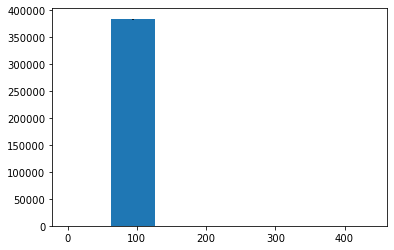

In [46]:
plothist(exp)

<BarContainer object of 7 artists>

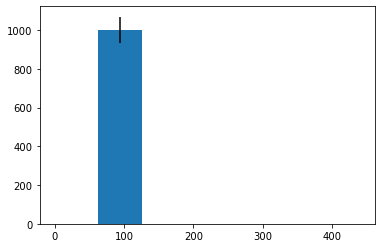

In [47]:
plothist(sig)

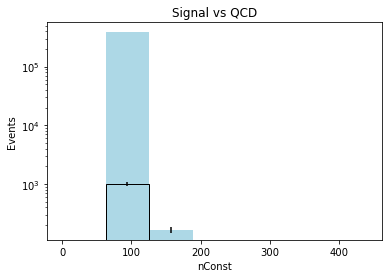

In [48]:
plt.bar(*exp.axes.centers, exp.values(), width=exp.axes.widths[0], yerr=exp.variances()**0.5, color='lightblue')
plt.bar(*sig.axes.centers, sig.values(), width=sig.axes.widths[0], yerr=sig.variances()**0.5, color='red', fill = False)
plt.title("Signal vs QCD")
plt.ylabel("Events")
plt.xlabel("nConst")
plt.yscale('log')
plt.savefig("plots/SUEP-m{}-generic_dist.png".format(mass))
plt.savefig("plots/SUEP-m{}-generic_dist.pdf".format(mass))
plt.show()

JES_2018


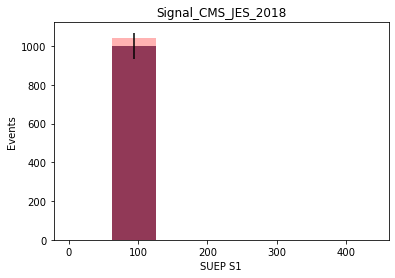

/tmp/ipykernel_2115990/972324322.py:16: RuntimeWarning: invalid value encountered in true_divide
  up_diff = np.abs(sig.values()-up.values())/sig.values()*100
/tmp/ipykernel_2115990/972324322.py:17: RuntimeWarning: invalid value encountered in true_divide
  down_diff = np.abs(sig.values()-down.values())/sig.values()*100


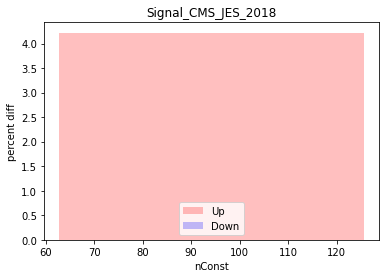

JER_2018


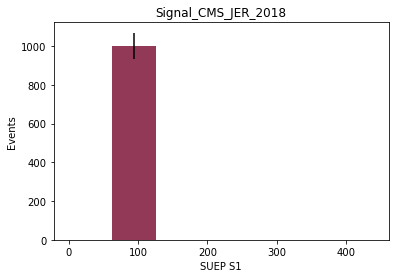

/tmp/ipykernel_2115990/972324322.py:16: RuntimeWarning: invalid value encountered in true_divide
  up_diff = np.abs(sig.values()-up.values())/sig.values()*100
/tmp/ipykernel_2115990/972324322.py:17: RuntimeWarning: invalid value encountered in true_divide
  down_diff = np.abs(sig.values()-down.values())/sig.values()*100


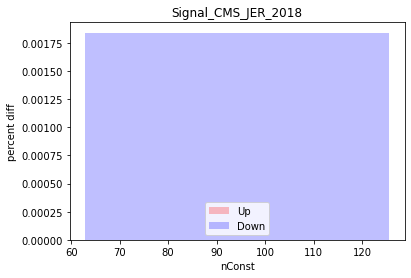

PU_2018


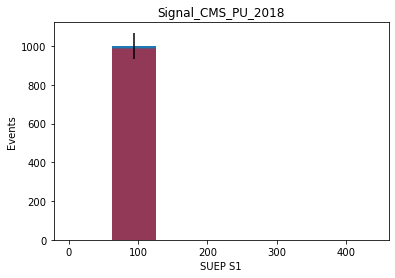

/tmp/ipykernel_2115990/972324322.py:16: RuntimeWarning: invalid value encountered in true_divide
  up_diff = np.abs(sig.values()-up.values())/sig.values()*100
/tmp/ipykernel_2115990/972324322.py:17: RuntimeWarning: invalid value encountered in true_divide
  down_diff = np.abs(sig.values()-down.values())/sig.values()*100


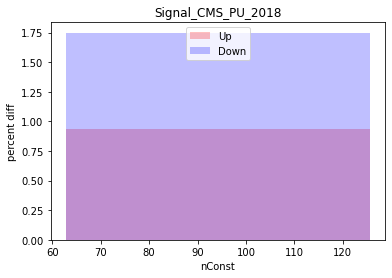

trigSF_2018


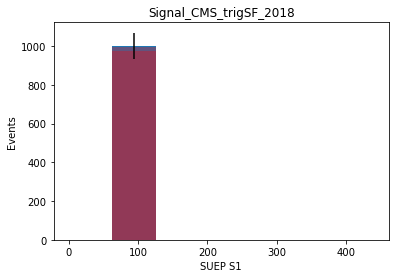

/tmp/ipykernel_2115990/972324322.py:16: RuntimeWarning: invalid value encountered in true_divide
  up_diff = np.abs(sig.values()-up.values())/sig.values()*100
/tmp/ipykernel_2115990/972324322.py:17: RuntimeWarning: invalid value encountered in true_divide
  down_diff = np.abs(sig.values()-down.values())/sig.values()*100


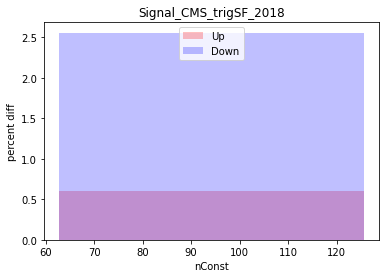

PS_ISR_2018


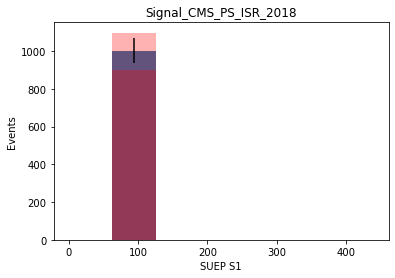

/tmp/ipykernel_2115990/972324322.py:16: RuntimeWarning: invalid value encountered in true_divide
  up_diff = np.abs(sig.values()-up.values())/sig.values()*100
/tmp/ipykernel_2115990/972324322.py:17: RuntimeWarning: invalid value encountered in true_divide
  down_diff = np.abs(sig.values()-down.values())/sig.values()*100


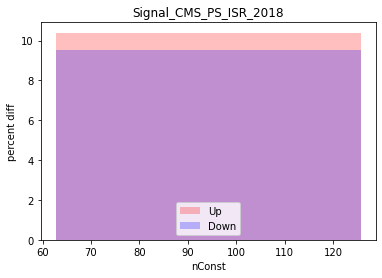

PS_FSR_2018


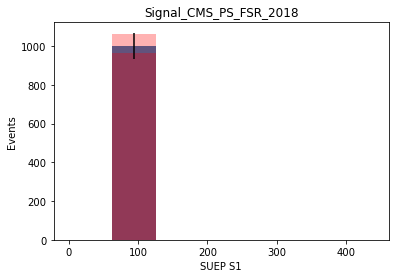

/tmp/ipykernel_2115990/972324322.py:16: RuntimeWarning: invalid value encountered in true_divide
  up_diff = np.abs(sig.values()-up.values())/sig.values()*100
/tmp/ipykernel_2115990/972324322.py:17: RuntimeWarning: invalid value encountered in true_divide
  down_diff = np.abs(sig.values()-down.values())/sig.values()*100


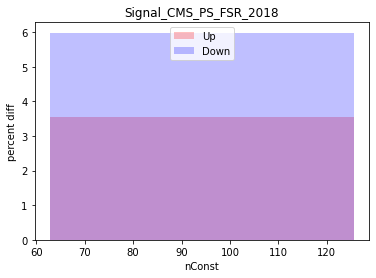

trk_kill_2018


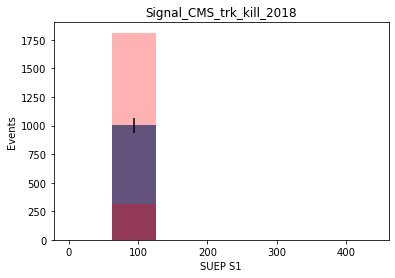

/tmp/ipykernel_2115990/972324322.py:16: RuntimeWarning: invalid value encountered in true_divide
  up_diff = np.abs(sig.values()-up.values())/sig.values()*100
/tmp/ipykernel_2115990/972324322.py:17: RuntimeWarning: invalid value encountered in true_divide
  down_diff = np.abs(sig.values()-down.values())/sig.values()*100


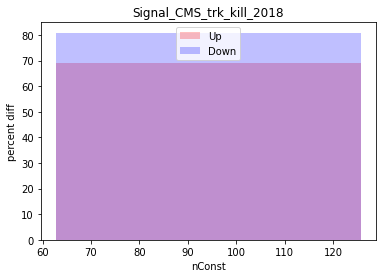

In [49]:
systs = ['JES_2018','JER_2018','PU_2018','trigSF_2018','PS_ISR_2018','PS_FSR_2018','trk_kill_2018']
for sys in systs:
    print(sys)
    if "Signal_CMS_"+sys+"Up" in list_keys:
        up = f["Signal_CMS_"+sys+"Up"].to_boost()
        down = f["Signal_CMS_"+sys+"Down"].to_boost()
    plothist(sig)
    plotvar(up)
    plotvar(down)
    plt.title("Signal_CMS_"+sys)
    plt.ylabel("Events")
    plt.xlabel("SUEP S1")
    plt.savefig("plots/SUEP-m{}-generic_{}.png".format(mass,sys))
    plt.savefig("plots/SUEP-m{}-generic_{}.pdf".format(mass,sys))
    plt.show()
    up_diff = np.abs(sig.values()-up.values())/sig.values()*100
    down_diff = np.abs(sig.values()-down.values())/sig.values()*100
    ups = plt.bar(*sig.axes.centers, up_diff, width=sig.axes.widths[0], color='red', alpha=0.25)
    downs = plt.bar(*sig.axes.centers, down_diff, width=sig.axes.widths[0], color='blue', alpha=0.25)
    plt.title("Signal_CMS_"+sys)
    plt.ylabel("percent diff")
    plt.xlabel("nConst")
    plt.legend([ups, downs], ['Up', 'Down'])
    plt.savefig("plots/SUEP-m{}-generic_{}_diff.png".format(mass,sys))
    plt.savefig("plots/SUEP-m{}-generic_{}_diff.pdf".format(mass,sys))
    plt.show()